# Physical setup


In [2]:
import jetset
print('tested on jetset',jetset.__version__)

tested on jetset 1.2.0rc13


## Basic  setup 

In [3]:
from jetset.jet_model import Jet
my_jet=Jet(name='test',electron_distribution='lppl',)

In [4]:
Jet.available_electron_distributions()

lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


to view all the paramters:

In [5]:
my_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


In [6]:
my_jet.parameters

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


None

and the corresponding  astropy table with units can be accessed by: `my_jet.parameters.par_table`

In [7]:
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


## Setting the parameters

In [7]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [8]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

## Investigating the electron distribution

In [9]:
my_jet.show_electron_distribution()

--------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False



model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
test,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
test,R,region_size,cm,1.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,5.000000e+03,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+02,1.000000e+00,1.000000e+09,False,False
test,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


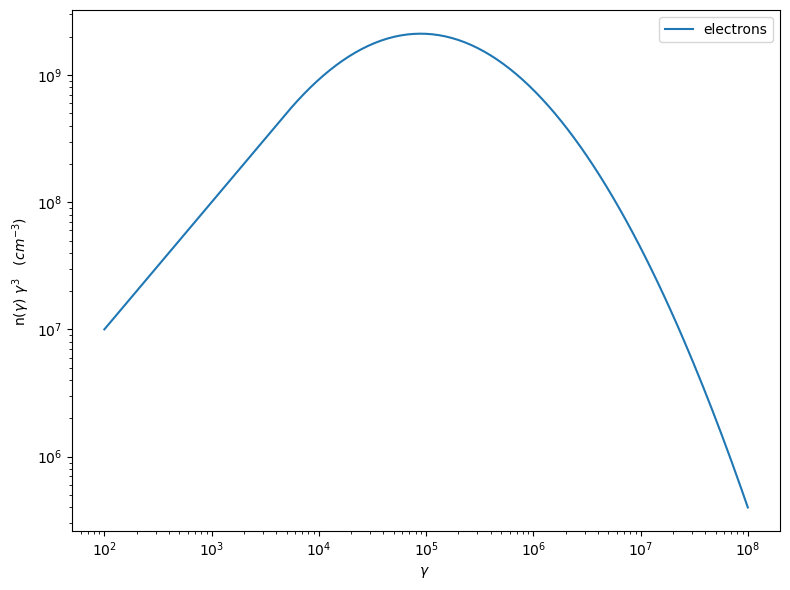

In [10]:
p=my_jet.electron_distribution.plot3p()

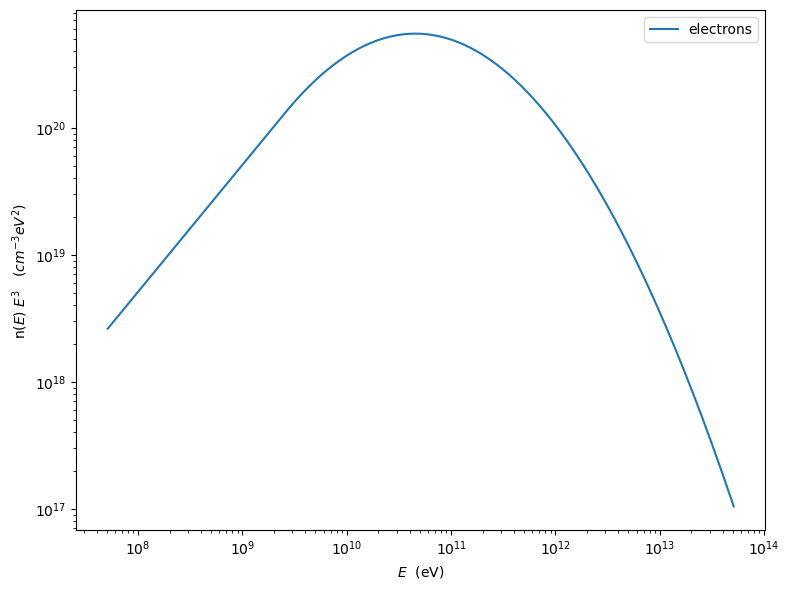

In [11]:
p=my_jet.electron_distribution.plot3p(energy_unit='eV')

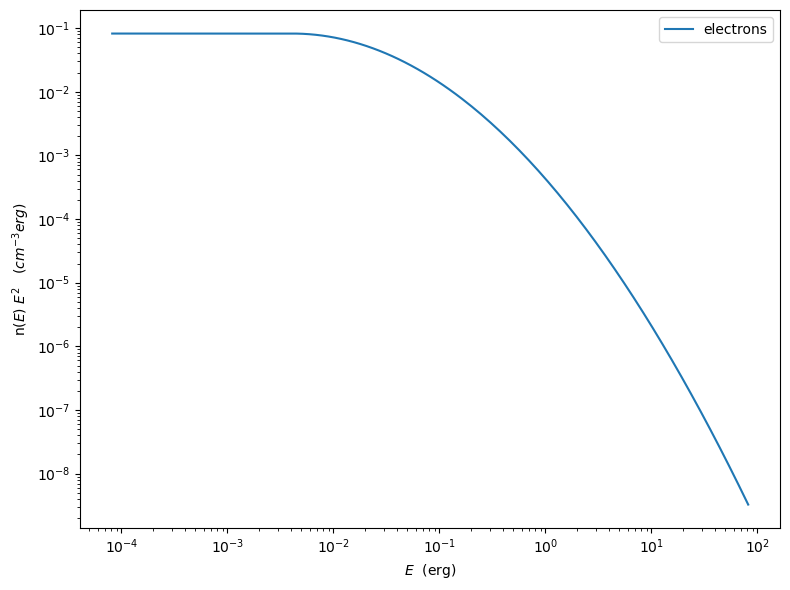

In [12]:
p=my_jet.electron_distribution.plot2p(energy_unit='erg')

to obtain a loglog plot, pass `loglog=True` to the `plot` method

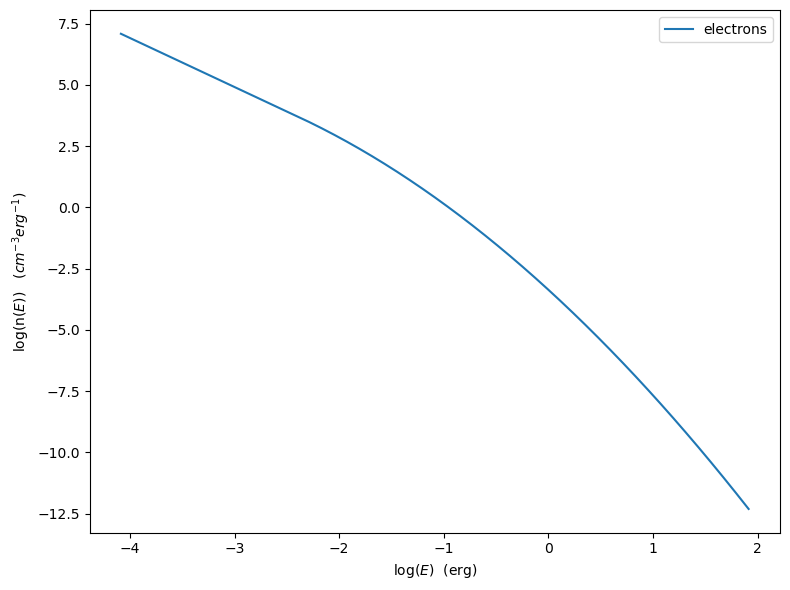

In [13]:
p=my_jet.electron_distribution.plot(energy_unit='erg',loglog=True)

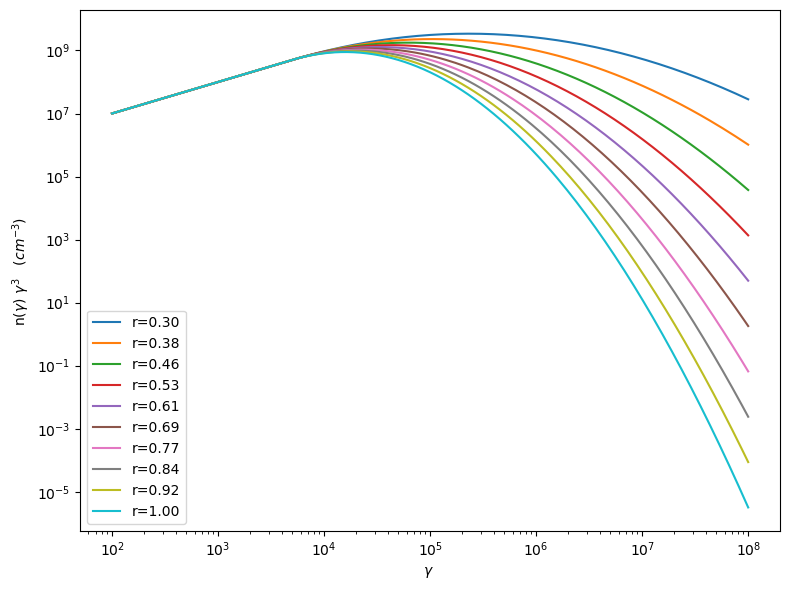

In [14]:
import numpy as np
p=None
for r in np.linspace(0.3,1,10):
    my_jet.parameters.r.val=r
    _l='r=%2.2f'%r
    if p is None:
        p=my_jet.electron_distribution.plot3p(label=_l)
    else:
        p=my_jet.electron_distribution.plot3p(p,label=_l)

###  Using log values for electron distribution parameters

In [8]:
my_jet=Jet(name='test',electron_distribution='lppl',electron_distribution_log_values=True)
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


## Evaluate and plot  the model


At this point we can evaluate the  emission for this jet model using the instruction

In [16]:
my_jet.eval()

In [17]:
my_jet.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


and plot the corresponding SED:


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset/plot_sedfit.py:58: UserWarning: `The rescale method has been he rescale method as been replaced by the setlim method
  warnings.warn('`The rescale method has been he rescale method as been replaced by the setlim method')


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
The rescale method as been replaced by the setlim method
please notice that now jetset uses log axis rather than loglog plots
so, the correct way to use it is rescale(x_min=8)->setlim(x_min=1E8)
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


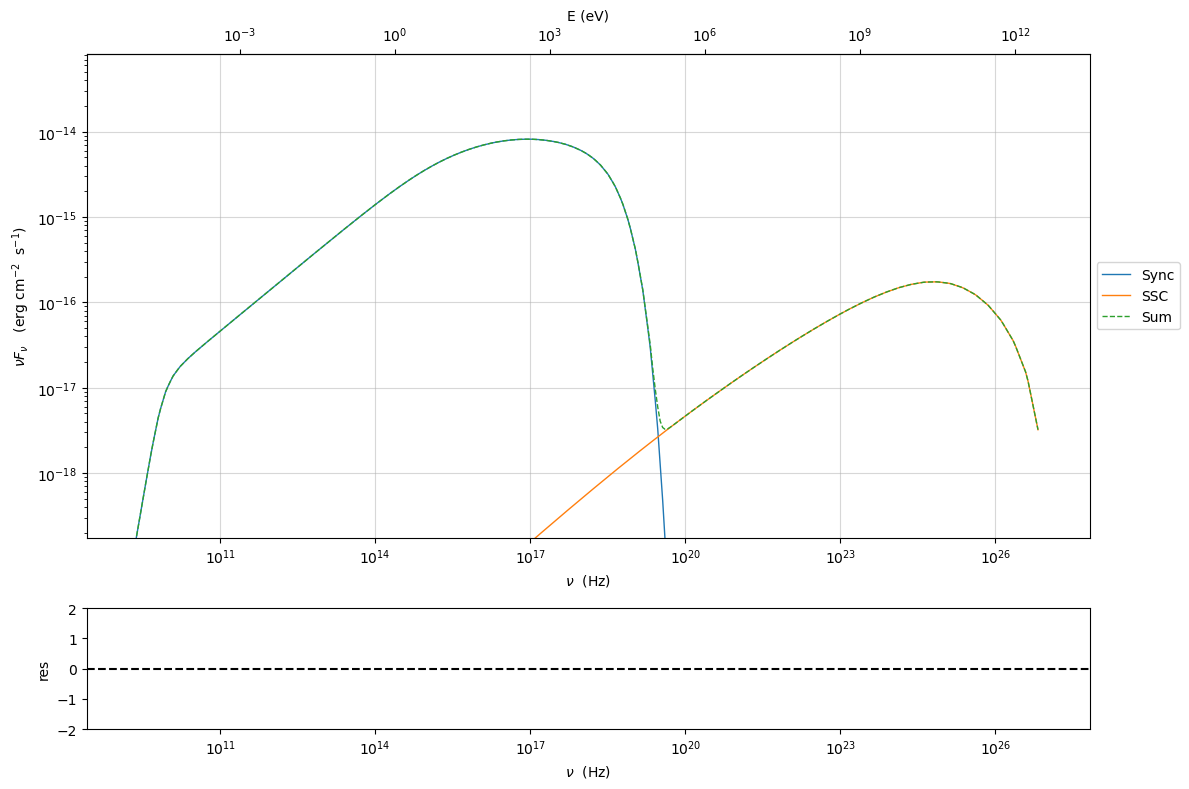

In [18]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_jet.plot_model(plot_obj=my_plot)
my_plot.setlim(y_min=10**-17.5)

alternatively, you can call the ``plot_model`` method without passing a ``Plot`` object

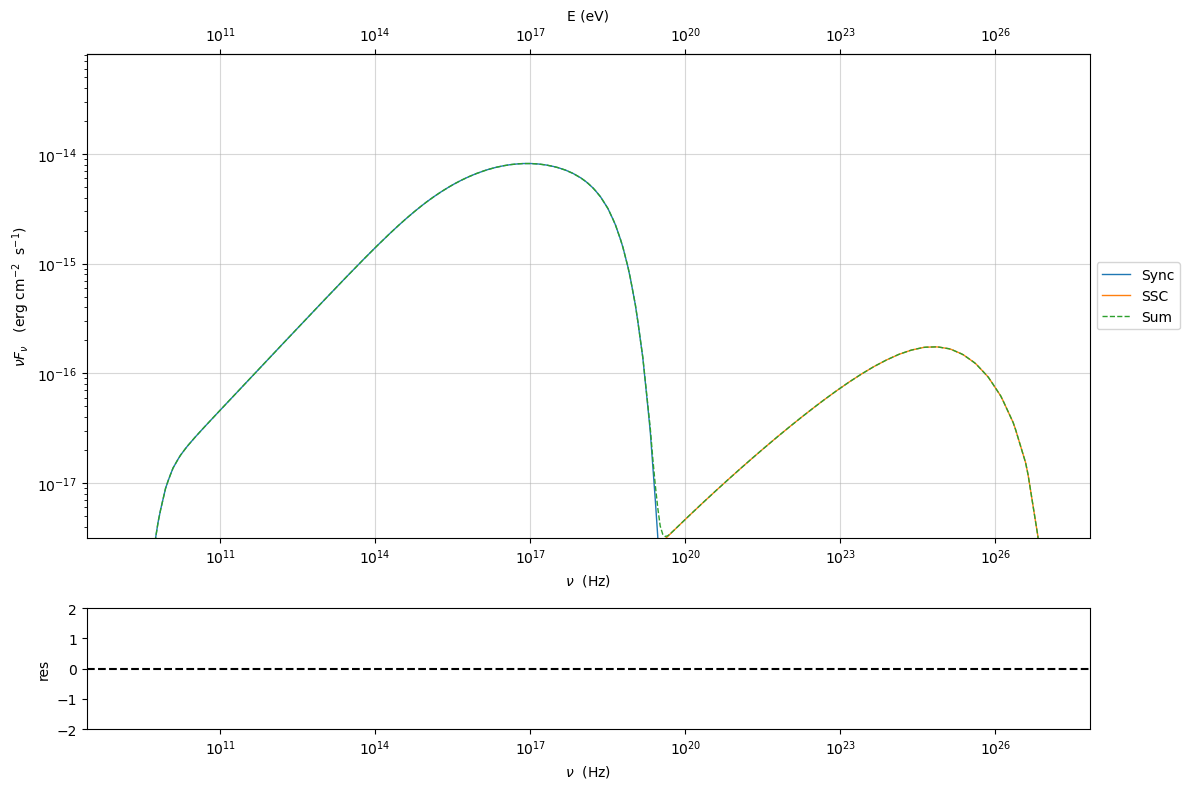

In [21]:
my_plot=my_jet.plot_model()
my_plot.setlim(y_min=10**-17.5)

In [22]:
my_jet.set_IC_nu_size(100)

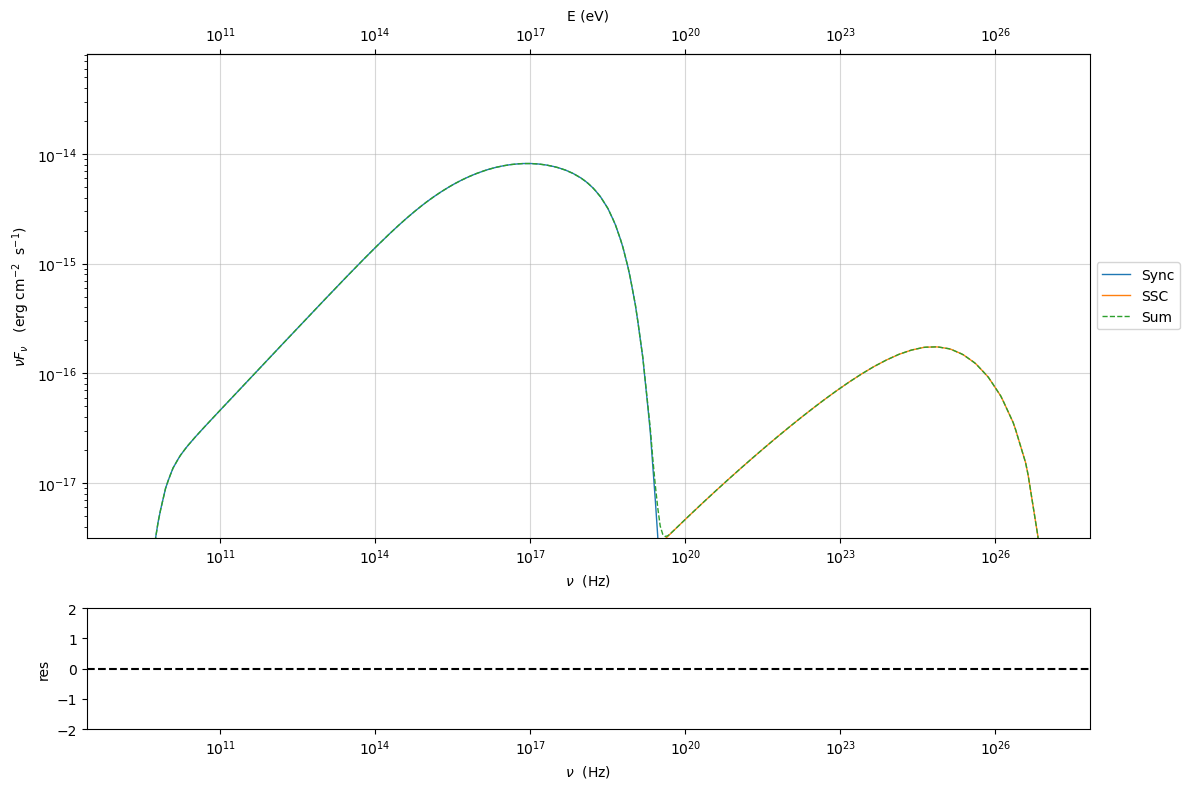

In [24]:
my_jet.eval()
my_plot=my_jet.plot_model()
my_plot.setlim(y_min=10**-17.5)

you can access the same plot, but in the rest frame of the black hole, or accretion disk, hence plotting the isotropic luminosity,
by simply passing the ``frame`` kw to ``src``

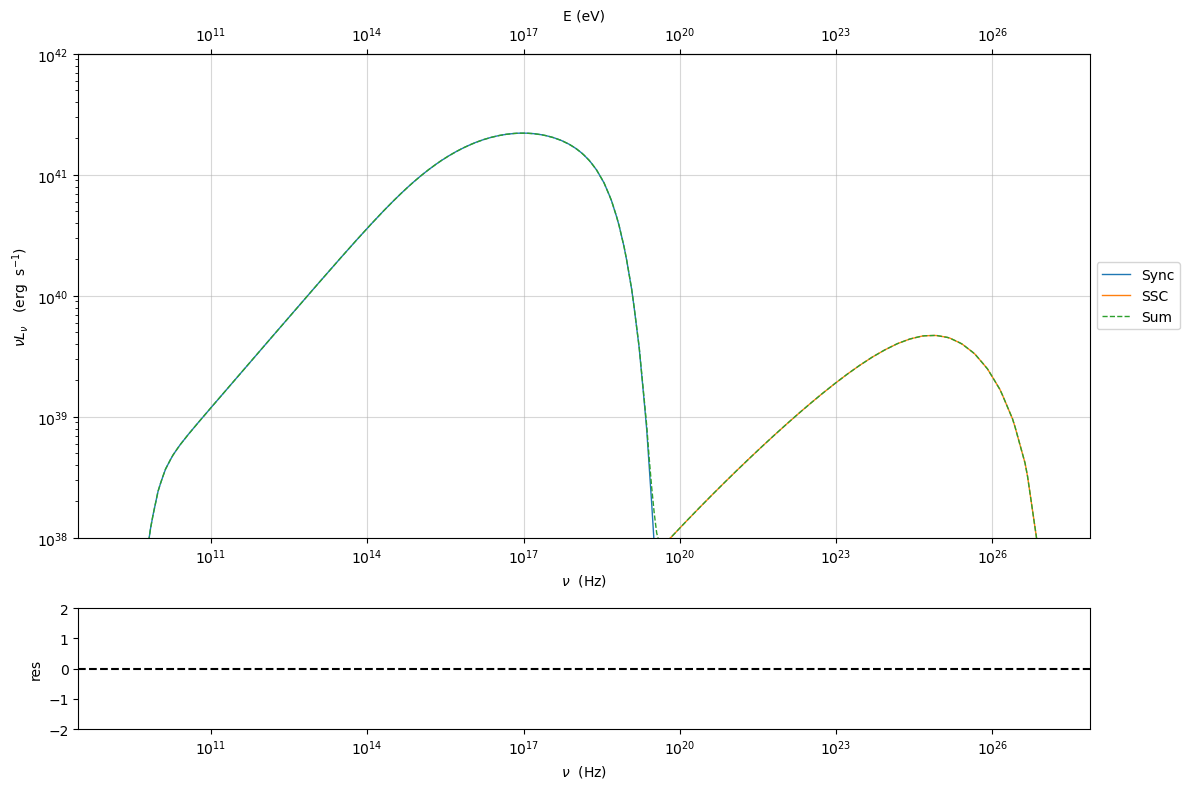

In [26]:
my_plot=my_jet.plot_model(frame='src')
my_plot.setlim(y_max=1E42,y_min=1E38)

the ``my_plot`` object returned will be built on the fly by the  ``plot_model`` method

Starting from version 1.2.0 you can also plot in the `Fnu` or `Lnu` representation adding the `density=True` keyword to the `plot_model command`

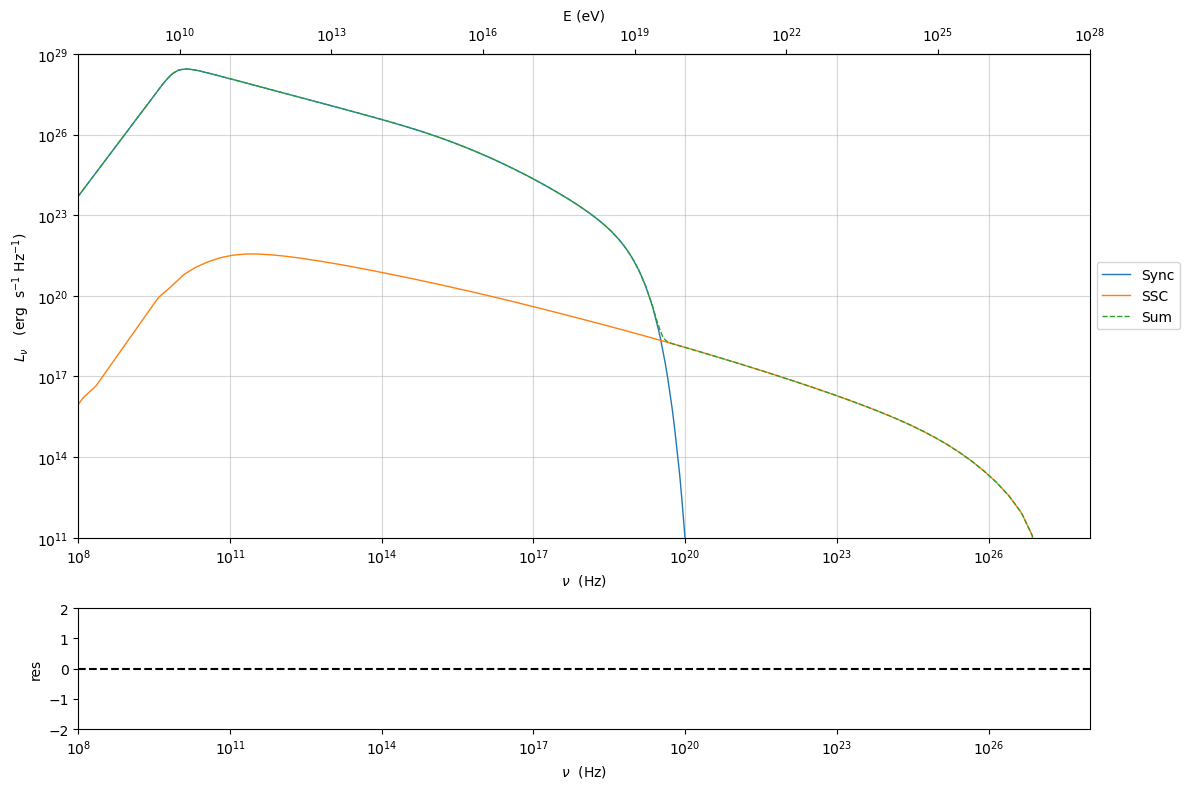

In [27]:
my_plot=my_jet.plot_model(frame='src',density=True)
my_plot.setlim(y_max=1E29,y_min=1E11,x_min=1E8,x_max=1E28)

### Changing the nu grid 
The `SED info`  header displayed by the `.show_model()` methods reports information for the SED  `nu_min`, `nu_max`, `nu_size` and `nu_grid_size`. 
- The `nu_grid_size` is the internal interpolation grid used by `jetkernel` C code, and it should not be changed
- The `nu_size` is the python  interpolation grid used by python wrapper on top of the `jetkernel` one, and is used only for the SEDs production and plotting. 
- `nu_min` and `nu_max`, are used for the boundaries of the model, and can be changed if the custom value does not cover your expected range. *Notice* that if the model is below the source emissivity or flux plot lower bound, then your changes on `nu_min`/`nu_max` will have no effect.

In [21]:
my_jet.nu_min=1E10
my_jet.nu_size=400
my_jet.nu_max=1E30

In [22]:
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  True

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 400
 nu mix (Hz): 1.000000e+10
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,3.010300e-01,0.000000e+00,9.000000e+00,True,False
test,gmax,high-energy-cut-off,lorentz-factor*,6.000000e+00,0.000000e+00,1.500000e+01,True,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,4.000000e+00,0.000000e+00,9.000000e+00,True,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


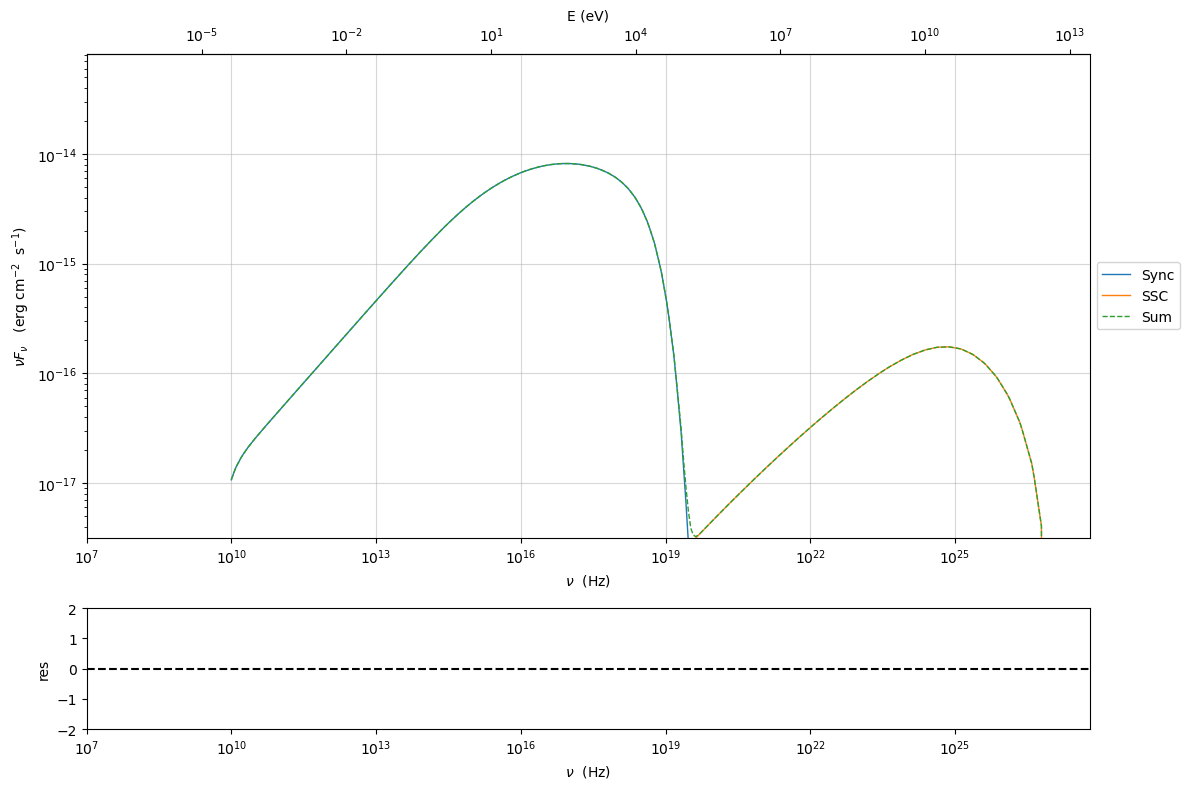

In [23]:
my_jet.eval()
p=my_jet.plot_model()
p.setlim(x_min=1E7,y_min=10**-17.5)

## Comparing models on the same plot

to compare the same model after changing a parameter

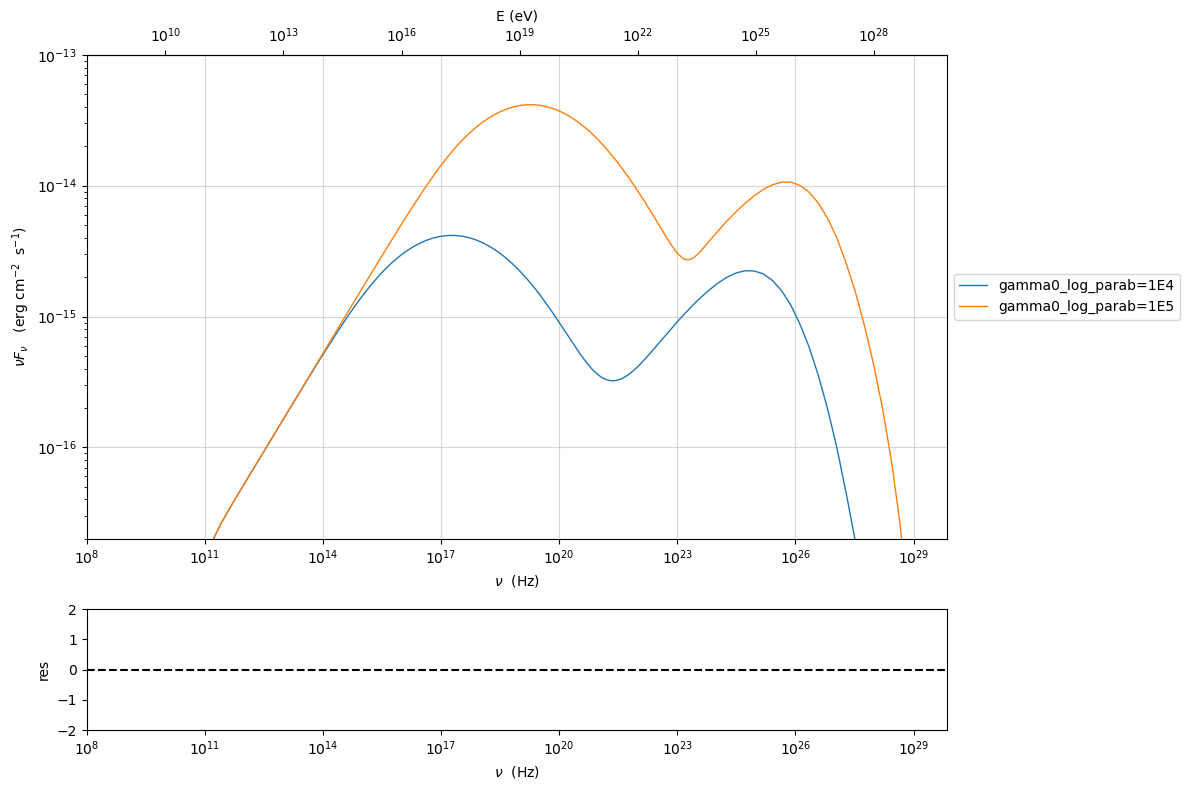

In [28]:
my_jet=Jet(name='test',electron_distribution='lppl',)
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=10**14.5)
my_jet.set_par('N',val=1E3)

my_jet.parameters.gamma0_log_parab.val=1E4
my_jet.eval()
my_plot=my_jet.plot_model(label='gamma0_log_parab=1E4',comp='Sum')
my_jet.set_par('gamma0_log_parab',val=1.0E5)
my_jet.eval()
my_plot=my_jet.plot_model(my_plot,label='gamma0_log_parab=1E5',comp='Sum')
my_plot.setlim(y_max=1E-13,y_min=2E-17,x_min=1E8)

## Saving a plot

to save the plot

In [29]:
my_plot.save('jet1.png')

## Saving and loading  a model

In [30]:
my_jet.save_model('test_model.pkl')

In [31]:
my_jet_new=Jet.load_model('test_model.pkl')

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,gmin,low-energy-cut-off,lorentz-factor*,1.000000e+02,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+08,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+03,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+05,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False
test,r,spectral_curvature,,4.000000e-01,-1.500000e+01,1.500000e+01,False,False
test,R,region_size,cm,3.162278e+14,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,2.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False


## Switching on/off the particle distribution normalization

In [32]:
my_jet.Norm_distr

True

and then you can switch off the normalization withe command

In [33]:
my_jet.switch_Norm_distr_OFF()

OR

In [34]:
my_jet.Norm_distr=0

In [35]:
my_jet.switch_Norm_distr_ON()

OR

In [36]:
my_jet.Norm_distr=1

## Setting the particle density  from observed Fluxes or Luminosities

In [37]:
my_jet=Jet(name='test',electron_distribution='lppl')

this is the initial value of N

In [38]:
my_jet.parameters.N.val

100.0

In [39]:

my_jet.set_N_from_nuFnu(nuFnu_obs=1E-14,nu_obs=1E15)

This is the updated value of ``N``, obtained in order to match the given flux at the given frequency

In [40]:
my_jet.get_par_by_name('N').val

272.37555111028803

OR

In [41]:
my_jet.parameters.N.val

272.37555111028803

In [42]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,2.723756e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


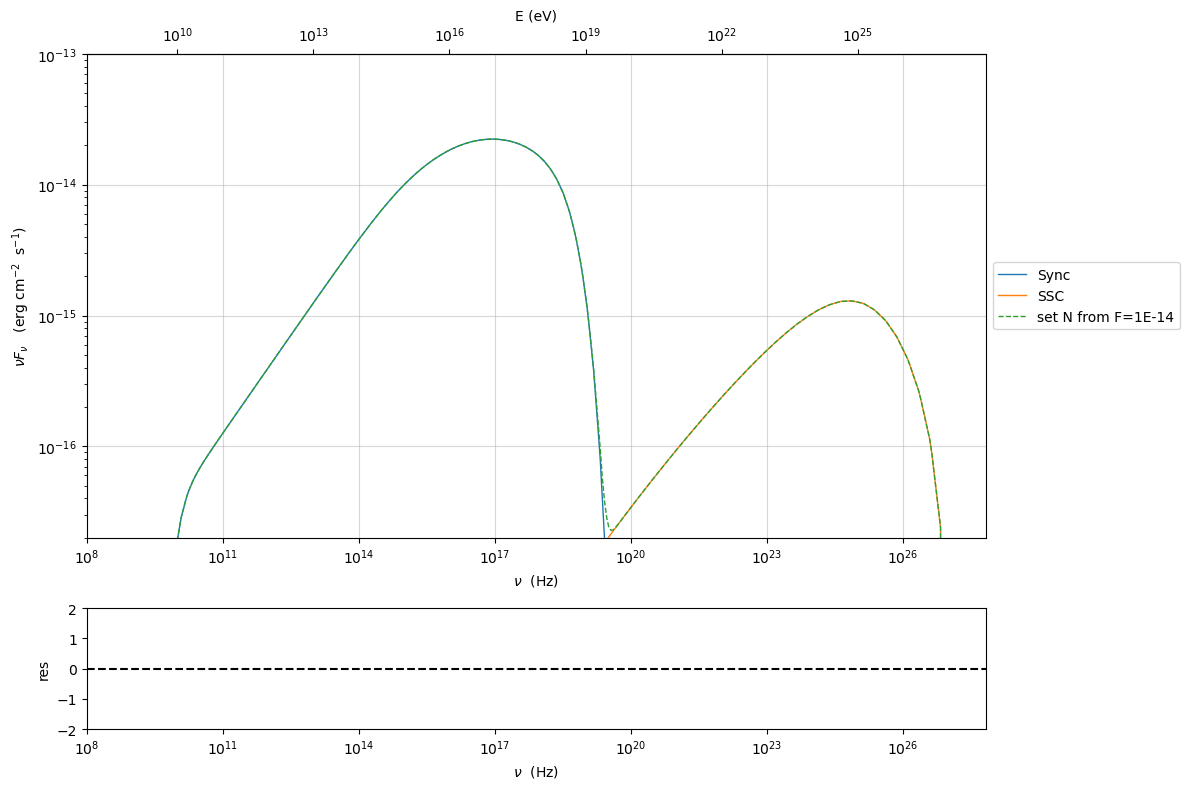

In [43]:
my_jet.eval()
my_plot=my_jet.plot_model(label='set N from F=1E-14')
my_plot.setlim(y_max=1E-13,y_min=2E-17,x_min=1E8)

In [44]:
my_jet.set_N_from_nuLnu(nuLnu_src=1E43,nu_src=1E15)

## Setting the beaming factor and expression

In [45]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')

In [46]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,--,False,False
test,BulkFactor,jet-bulk-factor,lorentz-factor*,1.000000e+01,1.000000e+00,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


In [47]:
my_jet.get_beaming()

19.943844732554165

In [48]:
my_jet.set_par('theta',val=10.)

In [49]:
my_jet.get_beaming()

4.968041140891955

of course setting `beaming_expr=delta` we get the same beaming expression as in the default case

In [50]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')

In [51]:
my_jet.parameters.show_pars()

model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


## Switch ON/OFF Synchrotron sefl-absorption and IC emission

In [52]:
my_jet.show_model()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,beam_obj,beaming,lorentz-factor*,1.000000e+01,1.000000e-04,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False
test,s,LE_spectral_slope,,2.000000e+00,-1.000000e+01,1.000000e+01,False,False


--------------------------------------------------------------------------------


as you see the state of Sync emission is `self-abs`, we can check accessing the specific spectral component state, and get the allowed states value

In [53]:
my_jet.spectral_components.Sync.show()

name                : Sync
var name            : do_Sync
state               : self-abs
allowed states : ['on', 'off', 'self-abs']


In [54]:
my_jet.spectral_components.Sync.state='on'

now the sate is 'on' with no 'self-abs' 

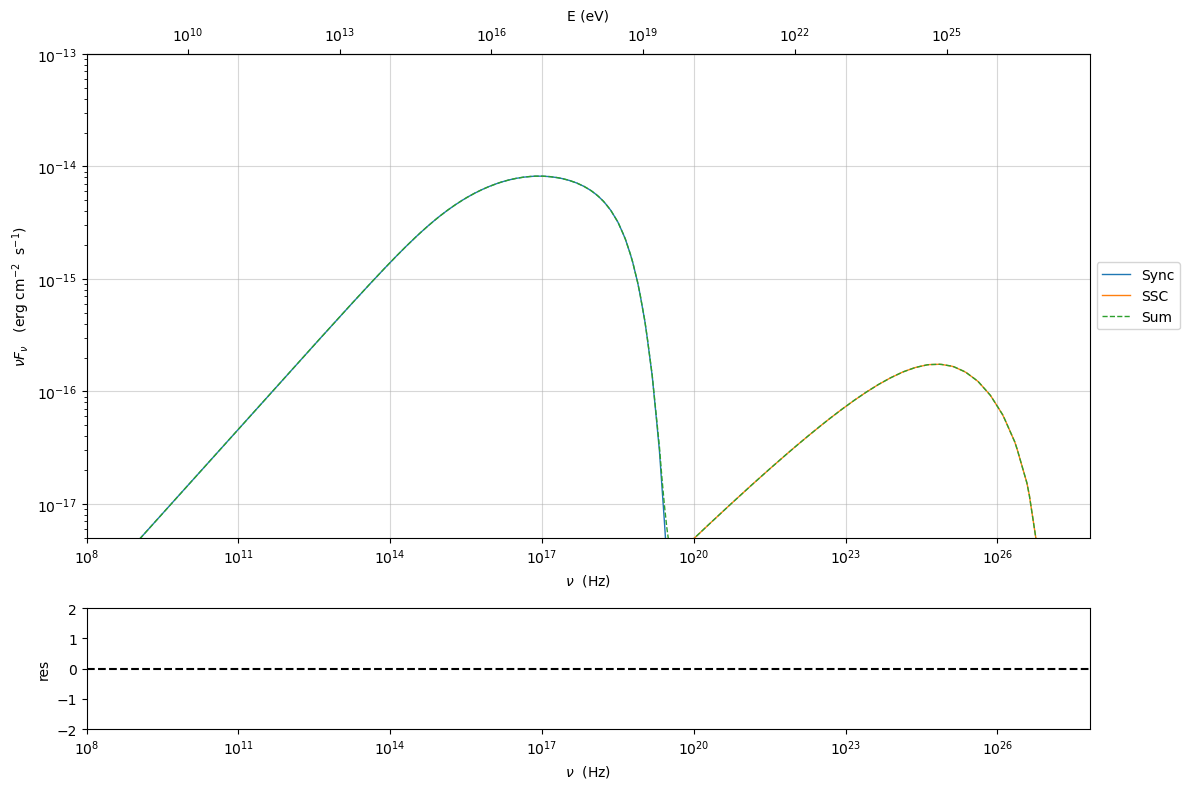

In [55]:
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=5E-18,x_min=1E8)

to re-enable

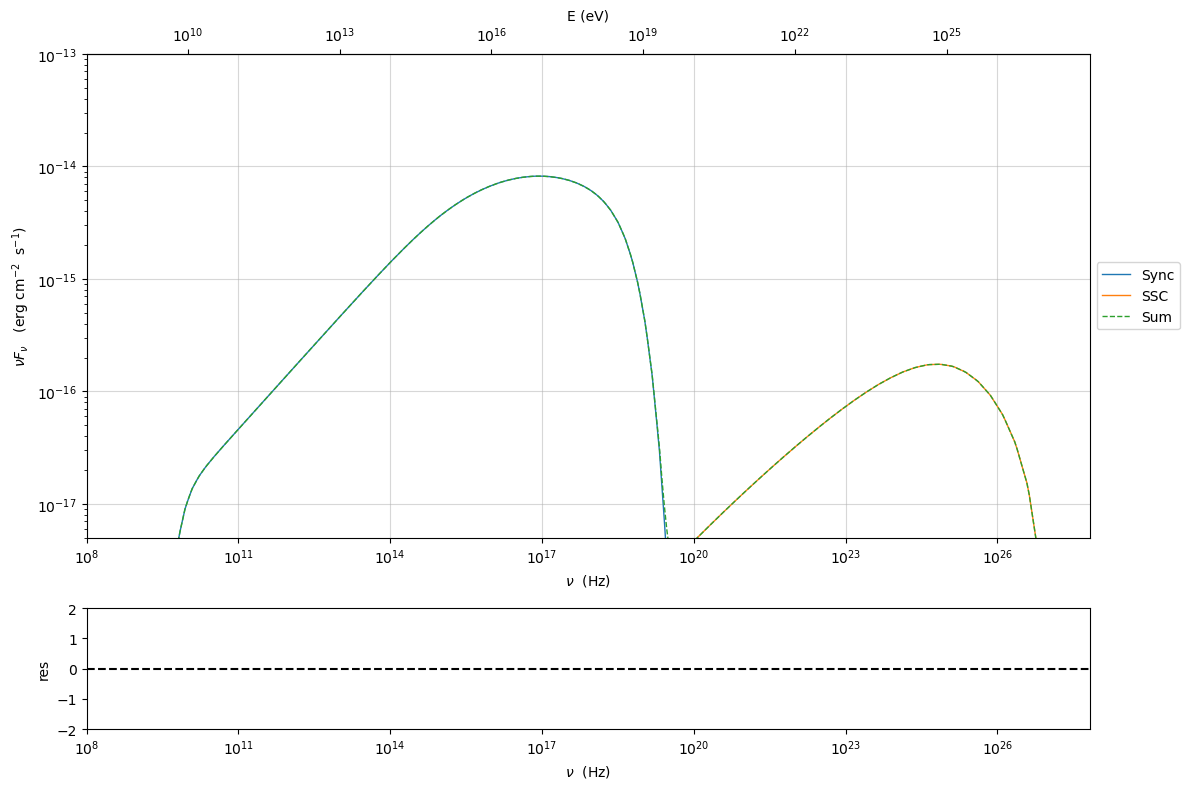

In [56]:
my_jet.spectral_components.Sync.state='self-abs'
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=5E-18,x_min=1E8)

In [57]:
my_jet.spectral_components.SSC.show()

name                : SSC
var name            : do_SSC
state               : on
allowed states : ['on', 'off']


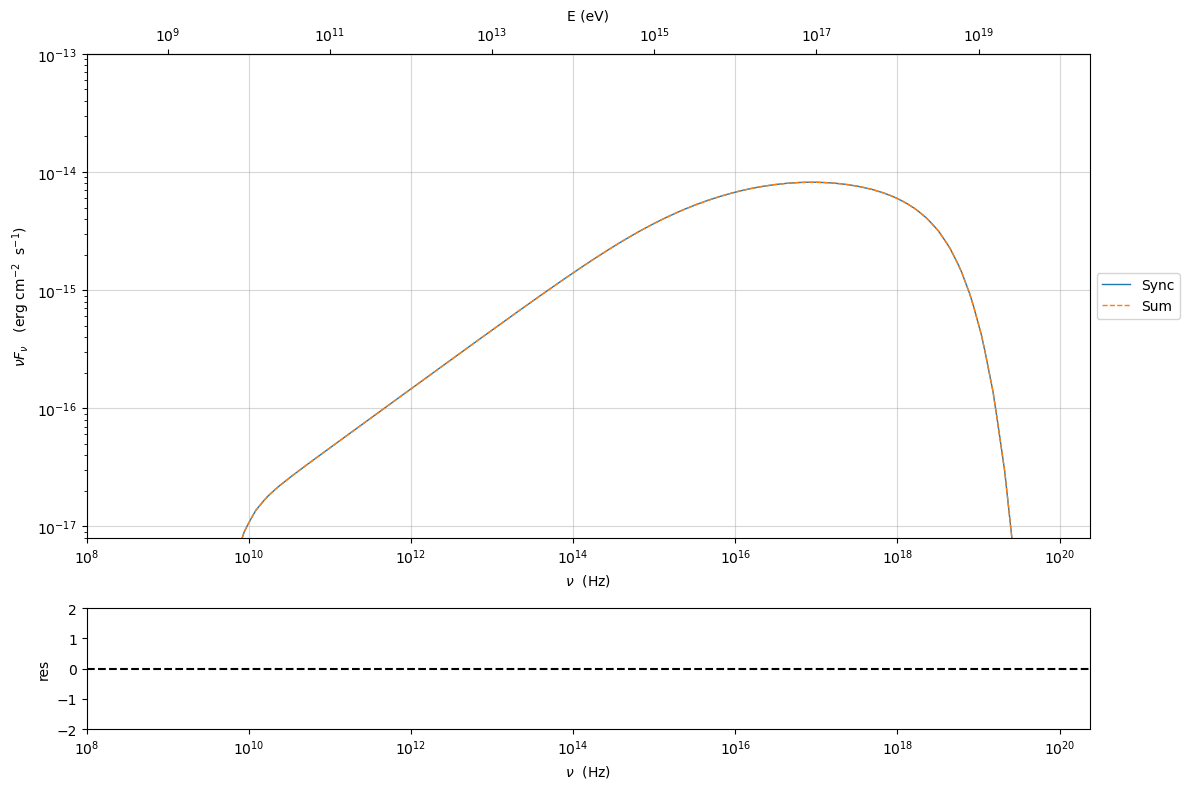

In [59]:
my_jet.spectral_components.SSC.state='off'
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=8E-18,x_min=1E8)

to re-enable

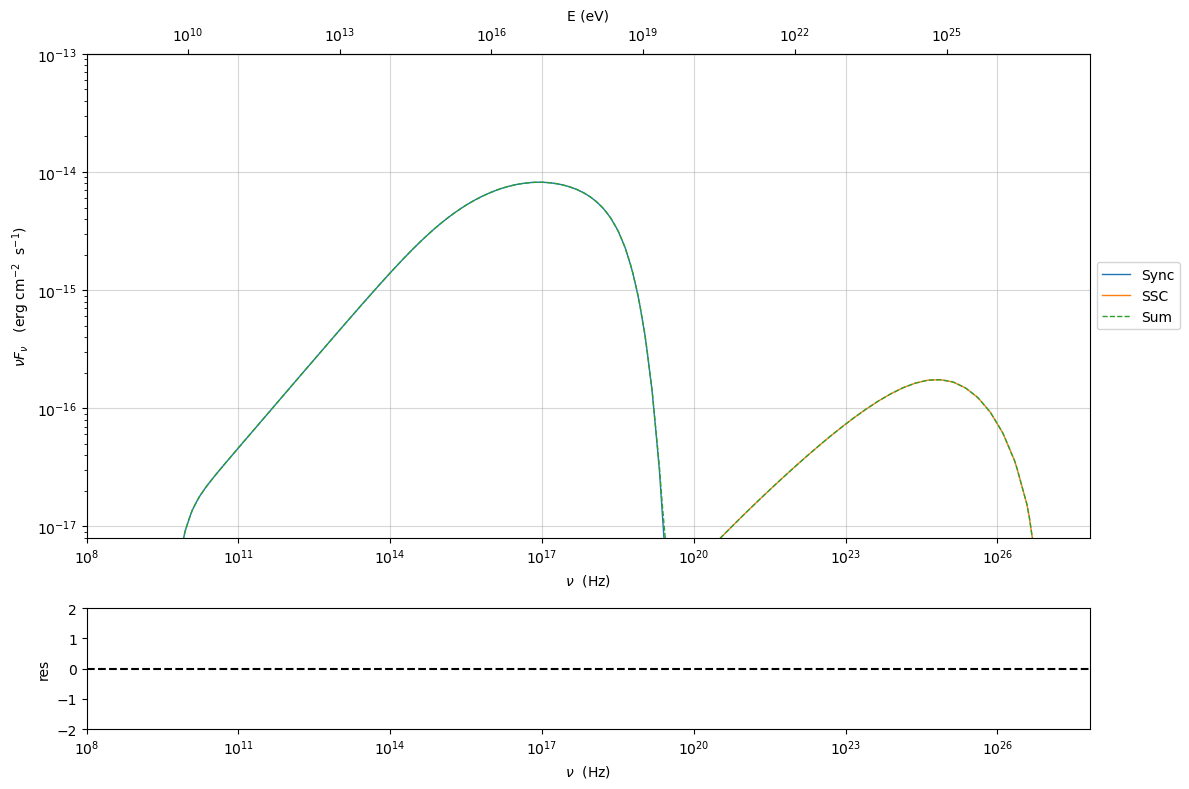

In [60]:
my_jet.spectral_components.SSC.state='on'
my_jet.eval()
p=my_jet.plot_model()
p.setlim(y_max=1E-13,y_min=8E-18,x_min=1E8)

## Accessing individual spectral components

It is possible to access specific spectral components of our model

In [61]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.eval()

In [62]:

my_jet.list_spectral_components()

Sum
Sync
SSC


the on-screen message is telling us which components have been evaluated. 

In [63]:
Sync=my_jet.get_spectral_component_by_name('Sync')

OR

In [64]:
Sync=my_jet.spectral_components.Sync

and from the ``SED`` object we can extract both the nu and nuFnu array

In [65]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [66]:
print (nuFnu_sync[::10])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 6.04250670e-26
 2.16351829e-24 9.84432972e-23 4.74613296e-21 2.28931297e-19
 1.09662087e-17 1.83733916e-16 4.11135769e-16 7.21745036e-16
 1.25581697e-15 2.18363181e-15 3.79383567e-15 6.57833387e-15
 1.13501032e-14 1.93585563e-14 3.21429895e-14 5.06938061e-14
 7.36908738e-14 9.77112603e-14 1.17645633e-13 1.28621805e-13
 1.26850509e-13 1.10646286e-13 7.82537850e-14 3.17631756e-14
 2.39710785e-15 8.88519981e-19 7.47780581e-29 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] erg / (cm2 s)


In [67]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [68]:
print (nuLnu_sync_src[::10])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.63219228e+30
 5.84406112e+31 2.65913465e+33 1.28201787e+35 6.18385569e+36
 2.96217481e+38 4.96299126e+39 1.11055338e+40 1.94956618e+40
 3.39219277e+40 5.89839143e+40 1.02478484e+41 1.77692906e+41
 3.06587177e+41 5.22910236e+41 8.68241307e+41 1.36933301e+42
 1.99052613e+42 2.63936099e+42 3.17782509e+42 3.47431170e+42
 3.42646573e+42 2.98875984e+42 2.11377876e+42 8.57981835e+41
 6.47502951e+40 2.40005601e+37 2.01989298e+27 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] erg / s


In [69]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [70]:
t_obs[::10]

nu,Sum,Sync,SSC
Hz,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s)
float64,float64,float64,float64
1000000.0,0.0,0.0,0.0
3026648.059395689,0.0,0.0,0.0
9160598.47544371,0.0,0.0,0.0
27725907.59860481,6.042506698961876e-26,6.042506698961876e-26,0.0
83916564.42830162,2.1635183262103024e-24,2.1635182921864927e-24,3.4023433519560716e-32
253985906.87807292,9.844329885880581e-23,9.844329720868366e-23,1.6498676086277722e-30
768725952.1663721,4.7461330192800106e-21,4.746132957910235e-21,6.136928342027515e-29
2326662911.331458,2.289313003537184e-19,2.289312967845199e-19,3.569167611890846e-27


In [71]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [72]:
t_src[::10]

nu,Sum,Sync,SSC
Hz,erg / s,erg / s,erg / s
float64,float64,float64,float64
1100000.0,0.0,0.0,0.0
3329312.865335258,0.0,0.0,0.0
10076658.322988082,0.0,0.0,0.0
30498498.35846529,1.6321922754264707e+30,1.6321922754264707e+30,0.0
92308220.8711318,5.844061207893652e+31,5.84406111598908e+31,9.190355615766844e+23
279384497.56588024,2.659134693097609e+33,2.659134648524772e+33,4.456596079142524e+25
845598547.3830093,1.2820178839927871e+35,1.2820178674156813e+35,1.6576972991066742e+27
2559329202.464604,6.183855784634422e+36,6.183855688223801e+36,9.64097864687752e+28


Of cousrse, since these colums have units, you can easily convert the units of the Synchrotron luminostity form erg/s to GeV/s

In [73]:
t_src['Sync'][::10].to('GeV/s')

<Quantity [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.01873429e+33,
           3.64757605e+34, 1.65970130e+36, 8.00172615e+37, 3.85965914e+39,
           1.84884409e+41, 3.09765550e+42, 6.93152902e+42, 1.21682350e+43,
           2.11724020e+43, 3.68148636e+43, 6.39620389e+43, 1.10907188e+44,
           1.91356665e+44, 3.26374898e+44, 5.41913600e+44, 8.54670440e+44,
           1.24238869e+45, 1.64735955e+45, 1.98344242e+45, 2.16849480e+45,
           2.13863170e+45, 1.86543717e+45, 1.31931693e+45, 5.35510141e+44,
           4.04139555e+43, 1.49799713e+40, 1.26071804e+30, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00] GeV / s>

the table can be easily saved as an ascii file

In [74]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)

or in fits format

In [75]:
t_src.write('test_SED.fits',format='fits',overwrite=True)

## Energetic report

It is possible to get an energetic report of the jet model (updated each time that you evaluate the model).
This report gives energy densities (`U_`) (both in the blob end disk restframe), the luminosities of the emitted
components in the blob restframe (`L_`), and the luminosity carried by the jet (`jet_L`) for the radiative 
components, the electrons, the magnetic fields, and for the cold protons in the jet.

### case of  beaming expression 'bulk_theta'

In [88]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='bulk_theta')
my_jet.parameters.BulkFactor.val=15

In [89]:
my_jet.eval()

In [90]:
my_jet.energetic_report()

name,type,units,val
BulkLorentzFactor,,,1.500000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.494838e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,4.418962e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


If you want to evaluate the energetic report in non verbose mode:

In [91]:
my_jet.energetic_report(verbose=False)

In [92]:
my_jet.energetic_dict

{'BulkLorentzFactor': 15.0,
 'U_e': 0.001736634756190472,
 'U_p_cold': 0.0,
 'U_B': 0.00039788735772973844,
 'U_p': 0.0,
 'U_p_target': 0.0,
 'U_Synch': 5.4948380795748906e-05,
 'U_Synch_DRF': 44.18961605963792,
 'U_Disk': 0.0,
 'U_BLR': 0.0,
 'U_DT': 0.0,
 'U_CMB': 0.0,
 'U_Disk_DRF': 0.0,
 'U_BLR_DRF': 0.0,
 'U_DT_DRF': 0.0,
 'U_CMB_DRF': 0.0,
 'L_Sync_rf': 1.725017708419289e+38,
 'L_SSC_rf': 3.362216361563802e+36,
 'L_EC_Disk_rf': 0.0,
 'L_EC_BLR_rf': 0.0,
 'L_EC_DT_rf': 0.0,
 'L_EC_CMB_rf': 0.0,
 'L_pp_gamma_rf': 0.0,
 'jet_L_Sync': 9.7032246098585e+39,
 'jet_L_SSC': 1.8912467033796387e+38,
 'jet_L_EC_Disk': 0.0,
 'jet_L_EC_BLR': 0.0,
 'jet_L_EC_DT': 0.0,
 'jet_L_EC_CMB': 0.0,
 'jet_L_pp_gamma': 0.0,
 'jet_L_rad': 9.892349280196463e+39,
 'jet_L_kin': 9.17982370994084e+41,
 'jet_L_tot': 1.1381973449570587e+42,
 'jet_L_e': 9.17982370994084e+41,
 'jet_L_B': 2.1032262468277818e+41,
 'jet_L_p_cold': 0.0,
 'jet_L_p': 0.0}

In [93]:
my_jet.energetic_report_table

name,type,units,val
str17,str29,object,float64
BulkLorentzFactor,,,1.500000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.494838e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,4.418962e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00


In [94]:
my_jet.show_model()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: test  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


model name,name,par type,units,val,phys. bound. min,phys. bound. max,log,frozen
test,R,region_size,cm,5.000000e+15,1.000000e+03,1.000000e+30,False,False
test,R_H,region_position,cm,1.000000e+17,0.000000e+00,--,False,True
test,B,magnetic_field,gauss,1.000000e-01,0.000000e+00,--,False,False
test,theta,jet-viewing-angle,deg,1.000000e-01,0.000000e+00,--,False,False
test,BulkFactor,jet-bulk-factor,lorentz-factor*,1.500000e+01,1.000000e+00,--,False,False
test,z_cosm,redshift,,1.000000e-01,0.000000e+00,--,False,False
test,gmin,low-energy-cut-off,lorentz-factor*,2.000000e+00,1.000000e+00,1.000000e+09,False,False
test,gmax,high-energy-cut-off,lorentz-factor*,1.000000e+06,1.000000e+00,1.000000e+15,False,False
test,N,emitters_density,1 / cm3,1.000000e+02,0.000000e+00,--,False,False
test,gamma0_log_parab,turn-over-energy,lorentz-factor*,1.000000e+04,1.000000e+00,1.000000e+09,False,False


--------------------------------------------------------------------------------


### case of  beaming expression 'delta'

In [98]:
my_jet=Jet(name='test',electron_distribution='lppl',beaming_expr='delta')
my_jet.parameters.beam_obj.val=25
my_jet.eval()

In [99]:
my_jet.energetic_report()

name,type,units,val
BulkLorentzFactor,,,2.500000e+01
U_e,Energy dens. blob rest. frame,erg / cm3,1.736635e-03
U_p_cold,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_B,Energy dens. blob rest. frame,erg / cm3,3.978874e-04
U_p,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_p_target,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_Synch,Energy dens. blob rest. frame,erg / cm3,5.494838e-05
U_Synch_DRF,Energy dens. disk rest. frame,erg / cm3,2.146421e+01
U_Disk,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
U_BLR,Energy dens. blob rest. frame,erg / cm3,0.000000e+00
